# Pandas

## CSV Data

In [1]:
import pandas as pd

#data frame
my_data = pd.read_csv('data/itunes_data.csv')
my_data.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


## Excel Data

In [2]:
excel_data = pd.read_excel('data/itunes_data.xlsx', engine='openpyxl')
excel_data.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [3]:
# inserting to sqlite database
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data/chinook.db')

query = """
SELECT tracks.name as Track, tracks.composer, tracks.milliseconds,
tracks.bytes, tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""

with engine.connect() as conn:
    # we cannot print the df here in conn block, cause it will closed and i don't know what
    sql_df = pd.read_sql_query(query, conn)
    # not executed
    sql_df.head(2).T

#executed
sql_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [4]:
# so the variables are still holding the value from connection which we can use in here
# we transpose the data become 2 column head and change col to row
sql_df.head(2).T

,0,1
Track,For Those About To Rock (We Salute You),Put The Finger On You
Composer,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson"
Milliseconds,343719,205662
Bytes,11170334,6713451
UnitPrice,0.99,0.99
Genre,Rock,Rock
Album,For Those About To Rock We Salute You,For Those About To Rock We Salute You
Artist,AC/DC,AC/DC


In [5]:
sql_df.index

RangeIndex(start=0, stop=3503, step=1)

In [6]:
sql_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [7]:
# Concat data
itunes_df = pd.concat([my_data, excel_data, sql_df])


In [8]:
# tail
itunes_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [9]:
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [10]:
# iloc [ row, col ]
print(itunes_df.iloc[-1,2])
# track at row 0 
print(itunes_df.iloc[0,0])

206005
All the Best Cowboys Have Daddy Issues


In [11]:
# loc -> show data from index
print(itunes_df.loc[3502])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


In [12]:
# duplicate index test
test_df = itunes_df.copy()
test_df = test_df.append(itunes_df.loc[3502])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [13]:
# solve the duplicate 
test_df.reset_index(inplace= True, drop= True)
test_df.loc[3502]

Track             Silver And Gold
Composer                     Bono
Milliseconds               279875
Bytes                     9199746
UnitPrice                    0.99
Genre                        Rock
Album           B-Sides 1980-1990
Artist                         U2
Name: 3502, dtype: object

In [14]:
# select column
itunes_df['Composer']

0                                     NaN
1                            Gilberto Gil
2       Milton Nascimento, Fernando Brant
3                                     NaN
4                                     NaN
                      ...                
3498                                 None
3499                       Franz Schubert
3500                   Claudio Monteverdi
3501              Wolfgang Amadeus Mozart
3502                         Philip Glass
Name: Composer, Length: 4021, dtype: object

In [15]:
# select multiple column
itunes_df[['Composer', 'Album','Artist','UnitPrice']]

,Composer,Album,Artist,UnitPrice
0,NaN,"Lost, Season 1",Lost,1.99
1,Gilberto Gil,Unplugged,Eric Clapton,0.99
2,"Milton Nascimento, Fernando Brant",Milton Nascimento Ao Vivo,Milton Nascimento,0.99
3,NaN,"The Office, Season 3",The Office,1.99
4,NaN,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos,0.99
...,...,...,...,...
3498,None,Respighi:Pines of Rome,Eugene Ormandy,0.99
3499,Franz Schubert,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet,0.99
3500,Claudio Monteverdi,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",0.99
3501,Wolfgang Amadeus Mozart,Mozart: Chamber Music,Nash Ensemble,0.99


# Data Dimension

In [16]:
# show (row, col)
print(itunes_df.shape)
# shape return tuple -> so selecting a row be like this
itunes_df.shape[0]

(4021, 8)


4021

In [17]:
# show info
itunes_df.info()
# it can determine the non-null row each col

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 442.7+ KB


In [18]:
# display the null in row True means null
itunes_df.isna()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3498,False,True,False,False,False,False,False,False
3499,False,False,False,False,False,False,False,False
3500,False,False,False,False,False,False,False,False
3501,False,False,False,False,False,False,False,False


In [19]:
# the show not na method
itunes_df.notna()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,True,False,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
3498,True,False,True,True,True,True,True,True
3499,True,True,True,True,True,True,True,True
3500,True,True,True,True,True,True,True,True
3501,True,True,True,True,True,True,True,True


In [20]:
# notnull method
itunes_df.notnull()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,True,False,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
3498,True,False,True,True,True,True,True,True
3499,True,True,True,True,True,True,True,True
3500,True,True,True,True,True,True,True,True
3501,True,True,True,True,True,True,True,True


In [21]:
# the isnull method
itunes_df.isnull()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3498,False,True,False,False,False,False,False,False
3499,False,False,False,False,False,False,False,False
3500,False,False,False,False,False,False,False,False
3501,False,False,False,False,False,False,False,False


In [22]:
# sum the na row
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [23]:
# sum the null row
itunes_df.isnull().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [24]:
# statistical properties ( the hard number )
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [25]:
# for non numeric
# the most frequent value
itunes_df['Genre'].mode()

0    Rock
dtype: object

In [26]:
itunes_df['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [27]:
itunes_df['UnitPrice'].value_counts()

0.99    3779
1.99     242
Name: UnitPrice, dtype: int64

In [28]:
# if too many unique value, we can use this to look only 10 up
itunes_df['Artist'].value_counts()[:10]

Iron Maiden        249
U2                 153
Led Zeppelin       131
Metallica          123
Lost               105
Deep Purple        100
Pearl Jam           80
Various Artists     64
Lenny Kravitz       63
Van Halen           62
Name: Artist, dtype: int64

In [29]:
# show unique items 
itunes_df['Artist'].unique().shape

(204,)

In [30]:
# data correlaton
itunes_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

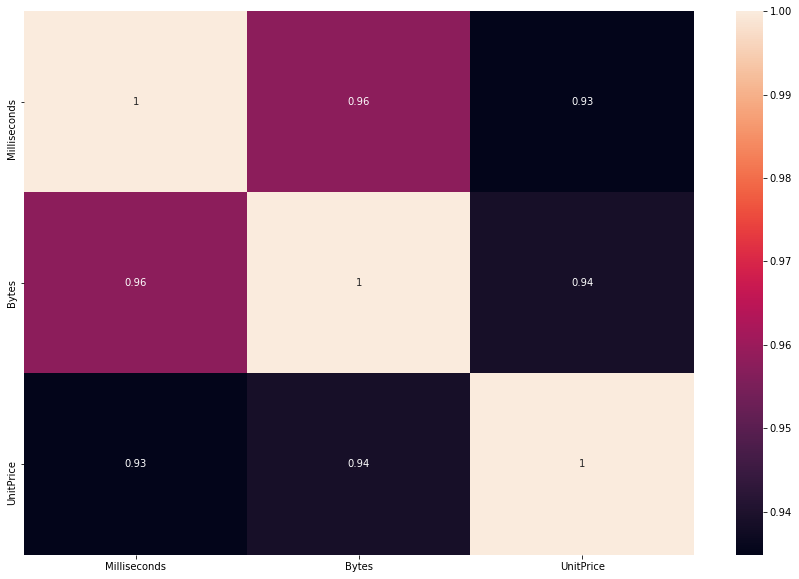

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(itunes_df.corr(), annot=True)

## Plotting

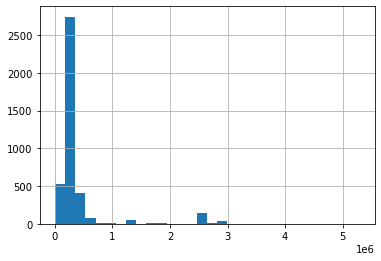

In [33]:
# explaining -> x axis ( the 0 1 2 3 4) is milliseconds data
# hist and bins specify the number of bars
itunes_df['Milliseconds'].hist(bins=30)
plt.show()

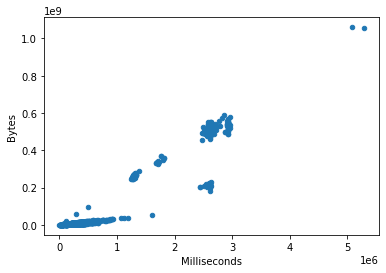

In [34]:
# scatter plot
itunes_df.plot.scatter(x='Milliseconds', y='Bytes')
plt.show()

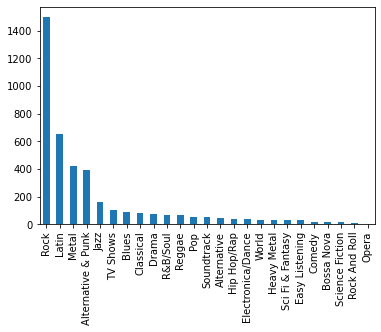

In [35]:
# for non numeric data
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

## Filtering

In [36]:
itunes_df[itunes_df['Milliseconds'] > 4e6 ]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [37]:
itunes_df[(itunes_df['Milliseconds'] > 2e6)]['Genre'].value_counts()

Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: Genre, dtype: int64

In [38]:
itunes_df[(itunes_df['Milliseconds'] > 2e6) & (itunes_df['Bytes'] < 0.4e9)]['Genre'].value_counts()

TV Shows    32
Name: Genre, dtype: int64

In [39]:
# not tv shows
itunes_df[itunes_df['Genre'] != 'Tv Shows' ]['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

In [40]:
# another way to negate mean the results won't add Tv Shows
itunes_df[~(itunes_df['Genre'] == 'Tv Shows')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
...,...,...,...,...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble


In [41]:
# some filtering method | filter all string that contain TV
itunes_df[itunes_df['Genre'].str.contains('TV')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
38,Diwali,NaN,1279904,252726644,1.99,TV Shows,"The Office, Season 3",The Office
148,The 23rd Psalm,NaN,2610416,487401604,1.99,TV Shows,"Lost, Season 2",Lost
209,"Lost (Pilot, Part 2)",NaN,2436583,204995876,1.99,TV Shows,"Lost, Season 1",Lost
...,...,...,...,...,...,...,...,...
3210,The Merger,None,1801926,345960631,1.99,TV Shows,"The Office, Season 3",The Office
3253,Pilot,None,2484567,492670102,1.99,TV Shows,Aquaman,Aquaman
3344,Eggtown,None,2608817,501061240,1.99,TV Shows,"LOST, Season 4",Lost
3347,Ji Yeon,None,2588797,506458858,1.99,TV Shows,"LOST, Season 4",Lost


## Remove Irrelevant Data

In [42]:
# drop composer , the axis=1 specify the whole columns
#itunes_df.drop('Composer', axis=1, inplace=True)
#itunes_df.columns()

In [46]:
itunes_df[itunes_df['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2947,Three Minutes,None,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
98,Romance Ideal,NaN,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3327,Todo o Carnaval tem seu Fim,None,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2457,We've Got To Get Together/Jingo,None,1070027,34618222,0.99,Rock,Santana Live,Santana
587,Vamos Dançar,None,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


In [47]:
# fill na with specific value
itunes_df['Composer'].fillna('Unknown', inplace=True)

In [53]:
itunes_df[itunes_df['Composer'].isna()].value_counts()

Series([], dtype: int64)

In [58]:
#duplicate value
itunes_df.duplicated().sum()

518

In [61]:
# deal with outliers data that not in the usual range of values | weird data
# for numeric data with interquartile range
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    
    return new_df

In [62]:
itunes_df_clean = remove_outliers(itunes_df, 'Milliseconds')

In [63]:
itunes_df_clean.shape

(3614, 8)

## Ensure Data Type

In [64]:
itunes_df['Milliseconds'] = itunes_df['Milliseconds'].astype(int)

In [65]:
itunes_df['Milliseconds']

0       2555492
1        295444
2        155428
3       1271938
4        231993
         ...   
3498     286741
3499     139200
3500      66639
3501     221331
3502     206005
Name: Milliseconds, Length: 4021, dtype: int32